# 순환 신경망으로 IMDB 리뷰 분류하기

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/9-2.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## IMDB 리뷰 데이터셋

In [1]:
from tensorflow.keras.datasets import imdb
# datasets인 imdb import
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
# 훈련 세트와 데이터 세트를 다운
# num_words=500으로 데이터셋에서 가장 자주 등장하는 단어 500개만 사용

17464789/17464789 [==============================] - 0s 0us/step


In [2]:
print(train_input.shape, test_input.shape)
# 훈련 세트와 데이터 세트 형태 출력

(25000,) (25000,)


In [3]:
print(len(train_input[0]))
# 1번째 리뷰의 길이 출력

218


In [4]:
print(len(train_input[1]))
# 2번째 리뷰의 길이 출력

189


In [5]:
print(train_input[0])
# 1번째 리뷰에 담긴 내용 출력

[1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]


In [6]:
print(train_target[:20])
# 타깃 데이터 출력

[1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 1]


In [7]:
from sklearn.model_selection import train_test_split
# train_test_split import
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)
# 훈련 세트와 검증 세트를 8:2로 나눔

In [8]:
import numpy as np
# numpy import
lengths = np.array([len(x) for x in train_input])
# 훈련 세트의 데이터들의 길이를 넘파이 배열 형태로 저장

In [9]:
print(np.mean(lengths), np.median(lengths))
# 리뷰의 길이의 평균과 중간값 출력

239.00925 178.0


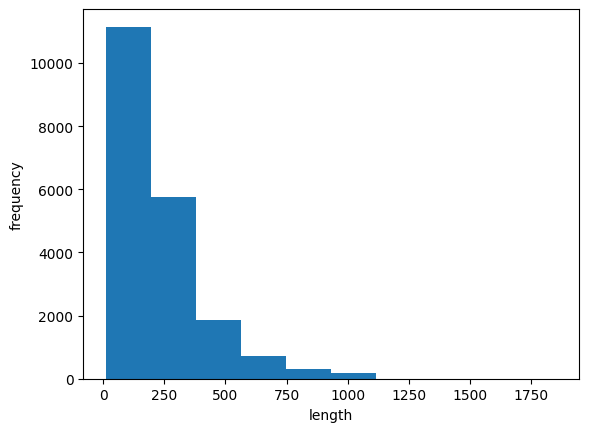

In [10]:
import matplotlib.pyplot as plt
# pyplot import
plt.hist(lengths)
plt.xlabel('length')
plt.ylabel('frequency')
plt.show()
# lengths 배열을 히스토그램으로 출력

In [11]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# pad_sequences import
train_seq = pad_sequences(train_input, maxlen=100)
# maxlen=100으로 설정하여 train_input의 길이를 100으로 맞춤

In [12]:
print(train_seq.shape)
# train_seq의 형태 출력

(20000, 100)


In [13]:
print(train_seq[0])
# train_seq의 1번째 샘플 출력

[ 10   4  20   9   2 364 352   5  45   6   2   2  33 269   8   2 142   2
   5   2  17  73  17 204   5   2  19  55   2   2  92  66 104  14  20  93
  76   2 151  33   4  58  12 188   2 151  12 215  69 224 142  73 237   6
   2   7   2   2 188   2 103  14  31  10  10 451   7   2   5   2  80  91
   2  30   2  34  14  20 151  50  26 131  49   2  84  46  50  37  80  79
   6   2  46   7  14  20  10  10 470 158]


In [14]:
print(train_input[0][-10:])
# train_input의 1번째 샘플의 끝 부분을 출력
# train_seq의 끝 부분과 일치하므로 train_seq의 앞 부분이 잘렸음을 확인

[6, 2, 46, 7, 14, 20, 10, 10, 470, 158]


In [15]:
print(train_seq[5])
# train_seq의 6번째 데이터 출력

[  0   0   0   0   1   2 195  19  49   2   2 190   4   2 352   2 183  10
  10  13  82  79   4   2  36  71 269   8   2  25  19  49   7   4   2   2
   2   2   2  10  10  48  25  40   2  11   2   2  40   2   2   5   4   2
   2  95  14 238  56 129   2  10  10  21   2  94 364 352   2   2  11 190
  24 484   2   7  94 205 405  10  10  87   2  34  49   2   7   2   2   2
   2   2 290   2  46  48  64  18   4   2]


In [16]:
val_seq = pad_sequences(val_input, maxlen=100)
# 검증 세트의 길이도 100으로 맞춤

## 순환 신경망 만들기

In [17]:
from tensorflow import keras
# keras import
model = keras.Sequential()
# Sequential 클래스 객체 model 생성
model.add(keras.layers.SimpleRNN(8, input_shape=(100, 500)))
# model에 SimpleRNN 층을 추가 input_shape=!100,500)으로 설정
model.add(keras.layers.Dense(1, activation='sigmoid'))
# model에 출력층을 추가하며 이진 분류이기 때문에 1개의 뉴런과 시그모이드 활성화 함수를 사용

In [18]:
train_oh = keras.utils.to_categorical(train_seq)
# keras의 원-핫 인코딩을 train_seq에 적용

In [19]:
print(train_oh.shape)
# train_oh 형태 출력

(20000, 100, 500)


In [20]:
print(train_oh[0][0][:12])
# train_oh의 1번째 샘플의 1번째 토큰 10 출력

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [21]:
print(np.sum(train_oh[0][0]))
# 나머지 원소 다 더해서 1이 되는지 확인

1.0


In [22]:
val_oh = keras.utils.to_categorical(val_seq)
# keras의 원-핫 인코딩을 val_seq에 적용

In [23]:
model.summary()
# model 요약 내용 출력

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 8)                 4072      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 4,081
Trainable params: 4,081
Non-trainable params: 0
_________________________________________________________________


## 순환 신경망 훈련하기

In [24]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# RMSprop의 학습률을 0.0001로 지정

model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy']으로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-simplernn-model.h5')
# ModelCheckpoint 콜백 사용

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# EarlyStopping 콜백 사용, patience=3으로 설정

history = model.fit(train_oh, train_target, epochs=100, batch_size=64, validation_data=(val_oh, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# epochs=100, batch_size=64으로 설정하고 훈련

Epoch 1/100
313/313 [==============================] - 19s 53ms/step - loss: 0.6984 - accuracy: 0.5027 - val_loss: 0.6974 - val_accuracy: 0.4956
Epoch 2/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6956 - accuracy: 0.5051 - val_loss: 0.6958 - val_accuracy: 0.5020
Epoch 3/100
313/313 [==============================] - 15s 48ms/step - loss: 0.6935 - accuracy: 0.5120 - val_loss: 0.6946 - val_accuracy: 0.5048
Epoch 4/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6919 - accuracy: 0.5190 - val_loss: 0.6935 - val_accuracy: 0.5114
Epoch 5/100
313/313 [==============================] - 15s 47ms/step - loss: 0.6904 - accuracy: 0.5268 - val_loss: 0.6926 - val_accuracy: 0.5162
Epoch 6/100
313/313 [==============================] - 17s 55ms/step - loss: 0.6890 - accuracy: 0.5327 - val_loss: 0.6918 - val_accuracy: 0.5204
Epoch 7/100
313/313 [==============================] - 16s 51ms/step - loss: 0.6877 - accuracy: 0.5393 - val_loss: 0.6910 - val_ac

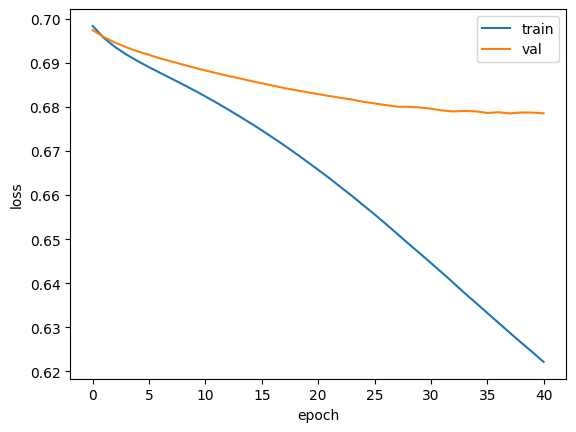

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 훈련 세트와 검증 세트 손실 그래프 출력

## 단어 임베딩을 사용하기

In [26]:
model2 = keras.Sequential()
# Sequential 객체 model2 생성
model2.add(keras.layers.Embedding(500, 16, input_length=100))
# models2에 Embedding층 추가, 단어 사전의 크기는 500, 임베딩 벡터의 크기는 16, input_length=100으로 설정
model2.add(keras.layers.SimpleRNN(8))
# models2에 SimpleRNN층 추가
model2.add(keras.layers.Dense(1, activation='sigmoid'))
# model에 출력층 추가, 이진 분류이기 때문에 1개의 뉴런과 시그모이드 활성화 함수를 사용
model2.summary()
# model2 요약 내용 출력

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 16)           8000      
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 200       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 8,209
Trainable params: 8,209
Non-trainable params: 0
_________________________________________________________________


In [27]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
# RMSprop의 학습률을 0.0001로 지정

model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy'])
# optimizer=rmsprop, loss='binary_crossentropy', metrics=['accuracy']으로 설정

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-embedding-model.h5')
# ModelCheckpoint 콜백 사용

early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# EarlyStopping 콜백 사용, patience=3으로 설정

history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])
# epochs=100, batch_size=64로 설정하고 훈련

Epoch 1/100
313/313 [==============================] - 9s 26ms/step - loss: 0.6973 - accuracy: 0.4980 - val_loss: 0.6967 - val_accuracy: 0.5004
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.6927 - accuracy: 0.5148 - val_loss: 0.6947 - val_accuracy: 0.5072
Epoch 3/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6895 - accuracy: 0.5310 - val_loss: 0.6935 - val_accuracy: 0.5146
Epoch 4/100
313/313 [==============================] - 8s 27ms/step - loss: 0.6866 - accuracy: 0.5451 - val_loss: 0.6925 - val_accuracy: 0.5186
Epoch 5/100
313/313 [==============================] - 9s 29ms/step - loss: 0.6838 - accuracy: 0.5576 - val_loss: 0.6917 - val_accuracy: 0.5230
Epoch 6/100
313/313 [==============================] - 10s 31ms/step - loss: 0.6808 - accuracy: 0.5702 - val_loss: 0.6911 - val_accuracy: 0.5258
Epoch 7/100
313/313 [==============================] - 8s 25ms/step - loss: 0.6777 - accuracy: 0.5806 - val_loss: 0.6907 - val_accura

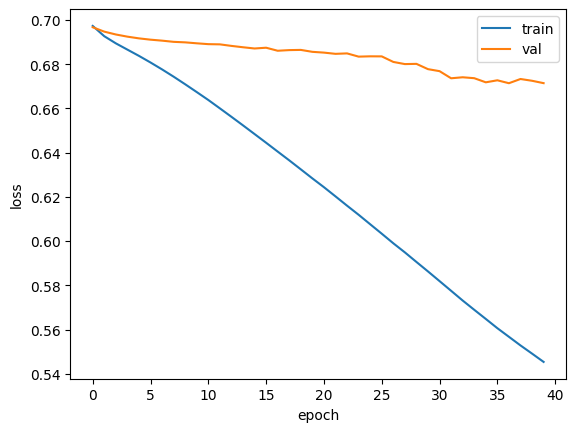

In [28]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 훈련 세트와 검증 세트 손실 그래프 출력